## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture - Laura
2. Get the data - done
3. Explore and visualise the data to gain insights - Laura
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms - Preprocessing - Kamil, make/cut different datasets
5. Explore many different models and short-list the best ones - Maks
6. Fine-tune your models - Choose like 2, max 3 models and fine tune them - Maks
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.

We are going to use supervised learning, classification. Based on basic info and personality traits we want to predict if a person is a user or a non-user. 

Explore the data and find out how many people are user for all of the drugs. If there is a drug with too little users or variance as data with low variance has no information/value. 

### Let the games begin!!!

# 1. Analysis

### ADD STUFF ABOUT HOW MUCH MORE HARMFUL UNIFORMED DRUG USE IS AS OPPOSED TO INFORMED !!!!!!!

We found a paper describing Substance Use Disorders across ages 18-90, illustrating differences by gender and race:

(Vasilenko S.A. et al. (2017), 'Age trends in rates of substance use disorders across ages 18–90: Differences by gender and race/ethnicity' - accessed at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5757874/)

According to this source, the age range with the most prevalent substance abuse is that of people in their twenties - for both genders, but more significantly for men. For this reason, we cross our fingers that our data set has a lot of data about young people, and that maybe there are a bit more Male respondents than Female, since these are at a higher risk of substance abuse.

(...)

But what if we could predict what drugs each person is likely to become a user of, *before* they become a user?

If given a dataset including information about 1885 respondents' personality traits and frequency of consumption for 18 legal & illegal drugs, could we then find out which drugs a person is likely to become a user of, depending on their personality?

If applied correctly, these predictions could be used to more accurately spread awareness material for drug use prevention, or, at least, safer drug use, in case it cannot be prevented - drastically (?) reducing its harm.

# 2. Data Acquisition & Overview

We found the dataset "Drug Consumptions (UCI)" on Kaggle, provided by the user Khadija. They got it from a paper released in 2015 called "The Five Factor Model of personality and evaulation of drug consumption risk", by E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban.

Let's break it down:

The dataset contains the following attributes:
- Age
- Gender (M or F)
- Education (ranging from what to what?)
- Country (which ones?)
- Ethnicity
- Score on different personality traits
    - Big-Five Scores (OCEAN):
        - Openness
        - Conscientiousness
        - Extraversion
        - Agreeableness
        - Neuroticism
    - Impulsiveness, measured by BIS-11
    - Sensation-Seeking, measured by ImpSS

It has, then, information about each individual's consumption of the following substances:
- Alcohol
- Amphetamines
- Amyl / Nitrite
- Benzodiazepine
- Caffeine
- Cannabis / Marijuana
- Chocolate
- Cocaine
- Crack Cocaine
- Ecstasy
- Heroin
- Ketamine
- Legal Highs
- LSD
- Methadone
- Magic Mushrooms
- Nicotine
- Semeron
    - Fictitious drug, for control
- Volatile Substance Abuse / Inhalants
    - (for example: spray deodorantes, glue, lighter refills)

The rating for each individual's use of each substance can be one of the following:
- CL0: Never Used
- CL1: Used over a Decade Ago
- CL2: Used in the Last Decade
- CL3: Used in the Last Year
- CL4: Used in the Last Month
- CL5: Used in the Last Week
- CL6: Used in the Last Day

## Personality Traits in Data Set

Now, a few more words on each of the aforementioned personality traits, just so we get a good picture of what we're looking at, including what to expect from each trait when a person's score is low or high in it.

Knowing each of these traits well might make us better at inferring these values for someone we want to make predictions for, as well as understanding our data better.

### Openness To Experience:
This trait is characterized by active imagination, aesthetic sensitivity, attentiveness to inner feelings, preference for variety, and intellectual curiosity.
Individuals with high openness seek novelty, creativity and intellectual pursuits, whereas people who score low on this trait thrive in procedure, compliance and routine.

### Conscientiousness:
Conscientiousness relates to being dutiful, responsible and careful. Someone with a high score in this trait is likely to be very focused, thorough and self-disciplined - but, if extreme, potentially a workaholic. On flip-side, someone with a lower score could be described as laid-back, easy-going and more fun to be around. If extreme, however, a person with a very low conscientiousness may come off as careless or disorganized.

### Extraversion:
Extraversion is framed as a function of stimulation - someone who is more sensitive to outside stimuli would score lower on extraversion, tending to prefer smaller crowds, quieter environments, and more focused, cognitively-demanding activities. On the flip side, someone with a high score in extraversion is less sensitive to external stimuli and, as a result, seeks more of it. They enjoy large gatherings, and come off as more energetic and lively. Extraverted people have an easier time asserting themselves and do not mind being the center of attention.

### Agreeableness:
Features of agreeableness include compassion, trust, honesty and politeness. Agreeable people are often popular, due to their inherent need for social harmony - they are more likely to "adapt to others", and to be people-pleasers. They avoid conflict and compromise in the favour of others. They are polite, affectionate and trusting of others. Conversely, people with a low Agreeableness score do not mind conflict, are better at standing their ground and do not care so much about what others think of them. For this reason, people who feel less need to be agreeable often make for excellent scientists, critics or soldiers.

### Neuroticism:
Neuroticism refers to an individual's susceptibility to stress, and a persistent tendency to be in a negative mood state. On one hand, someone with a high neurotic state experiences negative emotions such as anxiety, sadness, frustration, fear and anger more frequently than most people. This may or may not be associated with mental health concerns. On the other hand, someone with a low neurotic state is more even tempered - they go through negative emotions less often and less intensely than most people - although virtually everyone experiences them every now and then.

### Impulsiveness:
Impulsiveness is caracterized by a predisposition to rapid and unplanned decisions without adequate regard for the possible negative consequences. Impulsive individuals live under the "carpe diem" mindset, prioritizing spontaneity, whereas people with a lower impulsive score have a more strategic, planned, predictable and consistent approach to life, so they are far less likely to make rash decisions or act without thinking. Less impulsive individuals keep the big picture in mind and are often more successful in social relationships and long-term goals due to their greater reliability and thoughtfulness.

### Sensation Seeking:
The Sensation Seeking trait is characterized by the need for varied, novel, complex and intense situations and experiences. An individual with a strong SS trait may feel bored if they go a long period of time without nothing thrilling to do. These people are far more likely to do things that others might consider "crazy", and this can range all the way from climbing mountains to exploring recreational drugs, depending on the individual. In contrast, people with a low score on SS find higher leves of arousal unpleasant, and steer away from intense experiences, often enjoying routine and predictableness.

Now that we know, on a high level, what is in our dataset, it's a good idea to take a closer look at each feature so we are even more familiar with our data.

# 3. Data Exploration

Why don't we import the data and print out the first few columns?

In [54]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

dataRaw = pd.read_csv('Drug_Consumption.csv')
dataQuantified = pd.read_csv('Drug_Consumption_Quantified.csv')
# Quantified data refers to data that has been transformed or represented in a numerical format
# suitable for analysis and modeling by machine learning algorithms.

pd.set_option('display.max_columns', None)
dataRaw.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


First observations:
- The Age is given as ranges and not specific values
- So far, the Gender is M or F. Maybe someone in the dataset didn't specify? We can take a look further on.
- Education is what you would expect.
- The Personality Trait scores look a lot like Standard Deviation values, given their observed range in these few rows. We will take a closer look later.
- The drug consumption is measured from CL0 to CL6, as specified before. This might require a transformation later.

One of the first things worth looking into is whether our data has missing values or not. In the data set description, it said there were none, but let's just see it with our own eyes.

<Axes: >

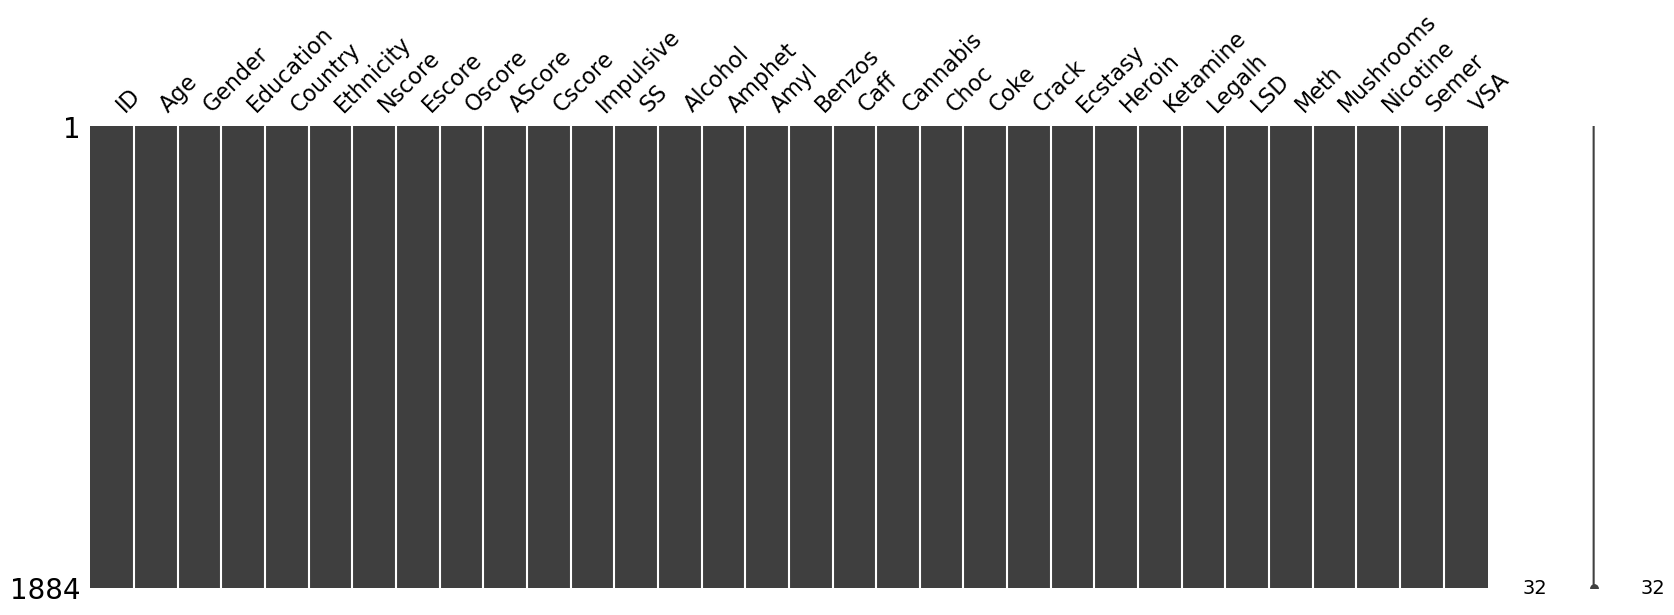

In [3]:
import missingno as mno

mno.matrix(dataRaw, figsize = (20, 6))

Nice, all filled out!

### Age
Let's see what is the distribution of Age ranges in our data.

<Axes: xlabel='Age'>

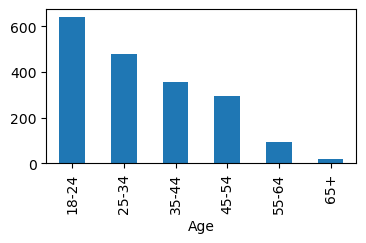

In [4]:
just_ages = dataRaw['Age']

plt.figure(figsize=(4,2))
just_ages.value_counts().plot(kind='bar')

Okay, it looks like we have a considerable amount of young people in our data set! This is good because of what was discussed in Analysis - since people in their twenties are at a higher risk of Substance Use Disorder, they are the one who have probably done the most drugs recently, so each data point will be more valuable than one that is not a regular user of many substances.

### Gender
Let's see the distribution of our data points in regards to gender, and whether or not we have a Gender value other than M or F.

<Axes: ylabel='count'>

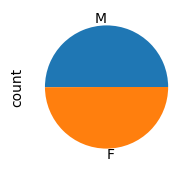

In [5]:
just_gender = dataRaw['Gender']

plt.figure(figsize=(4,2))
just_gender.value_counts().plot(kind='pie')

Oh my, that looks like a near-perfect split! And we don't have any value other than M or F, which makes things a bit simpler. This is good. We have a considerable sample size for both genders, meaning both are properly represented.

### Education
How many people do we have for each Education level? Let's see.

<Axes: ylabel='Education'>

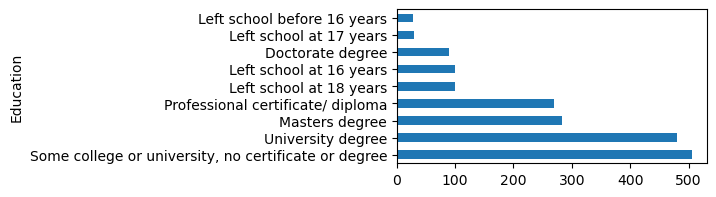

In [6]:
just_education = dataRaw['Education']

plt.figure(figsize=(4,2))
just_education.value_counts().plot(kind='barh')

Okay okay! It looks like we have a pretty diverse dataset, ranging from people who are barely educated (all of those who left school), people who are fairly educated (got a diploma, or did some college/university), and people who are very educated (finished university, got a master's degree, or even a doctorate degree).

Since some of these categories are pretty close to each other, we could consider merging some of them - for example, in the way I described above.

Either way, this diversity is good - by not having people of only one education level, we can find patterns that are not so closely link to the level of education but rather to other factors (such as personality), which is what we're going for.

### Country
The people in our data set - from what countries are they from? Let's see.

<Axes: ylabel='Country'>

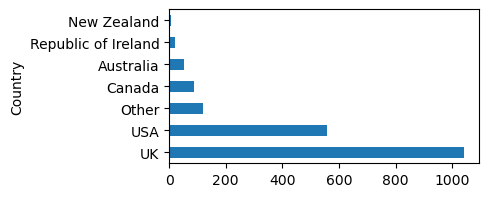

In [7]:
just_country = dataRaw['Country']

plt.figure(figsize=(4,2))
just_country.value_counts().plot(kind='barh')

It looks like we mostly have people from English-speaking countries, featuring a large majority (over half of the data set) from the United Kingdom, and a whopping one third from the USA. We also have a couple data points from the continent of Oceania. We hope that the respondents from the UK will be a good representation of European citizens' tendencies.

Our data seems to cover at least three continents - with this much diversity, we hope that our model will be able to find patterns that go beyond the person's national origin.

One thing that is worth keeping in mind is the ease of access to illicit substances across different countries. 

Given that our main countries are the UK and the USA, we did some research about the Drug Scene in these countries and found the following:

### UK Drug Scene
According to the 2019 Report of the Drug Situation in the United Kingdom, issued by the UK Government itself , the most prevalent drugs in the UK are:
- Cannabis
- (Powder) Cocaine
- MDMA
- Ketamine
- Amphetamine
- Opioids
- Benzodiazepines

Access the report here: https://www.gov.uk/government/publications/united-kingdom-drug-situation-focal-point-annual-report/uk-drug-situation-2019-summary

It is also worth noting that opioids were impled in 80% of the illicit-drug-related deaths in the UK. For this reason, this is a very high-risk type of drug for which awareness should be raised. For this reason, we will keep a closer eye on opioids during our research. The opioids we have in our data set are Heroin and Methadone.

The UK Drug Situation Report reinforced the fact that young people are especially vulnerable to substance abuse.

The report also states that the UK is one of the countries in Europe with the highest level of drug problems. In a way, this is good for us, because since UK respondents make for such a high percentage of our data, we will get very representative information - given that our chosen method of measuring performance was Recall, having the UK, a country with a lot of drug use, will probably increase our odds of finding all the actual positives. 

### USA Drug Scene
According to *the 2020 SAMSHA National Survey on Drug Abuse and Mental Health*, here's what we found about the Illicit Drug Scene in the USA in recent years:

The most prevalent addictive substances in the USA are, in order:

- Alcohol
- Nicotine
- Marijuana
- Opioids
- Inhalants
- Cocaine
- Stimulants
- Benzodiazepines
- Barbiturates (sleeping pills)

Nicotine addictions are a serious problem, particularly among young people due to the recent rise and ease of access to vaping devices.

Cannabis use in the US is very concerning among young people, with nearly a third of last-year high-schoolers reporting having used marijuana in the past year.

Just like in the UK, opioids are extremely lethal and addictive.

After these findings about the two most representative countries in our data, these are the drugs we will keep a close eye on when moving forward with our analysis and predictions:

- **Opioids**: Because of the high letality of this type of drug, allied to its widespread use.
- **Cannabis**: Because of its consistently high use across virtually all countries, which is particularly concerning among young people due to the long-term effects in brains that are far from being fully developed.
- **Nicotine**: Young people are particularly vulnerable to nicotine addicitons because the younger one is first exposed to the drug, the harder it is to let go of an addiction. If it is truly possible to predict a nicotine addiction based on personality traits, it is crucial to do so and prevent it.
- **Cocaine**: Cocaine lethalities are on the rise, and addiction remains a problem. This drug is widely used and abused, so this is something to tackle.

### Ethnicity
We looked at the countries where our respondents live, but what about their ethnicity? Could this be a factor to consider as well when making predictions? Let's see what we're working with, and maybe to a little more research if deemed relevant.

<Axes: ylabel='Ethnicity'>

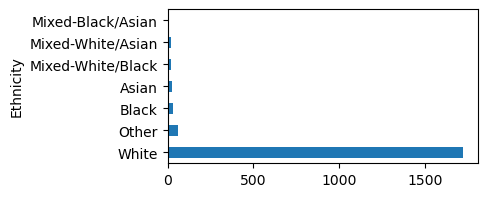

In [8]:
just_ethnicity = dataRaw['Ethnicity']

plt.figure(figsize=(4,2))
just_ethnicity.value_counts().plot(kind='barh')

It looks like there is an overwhelming majority of white respondents. Given this, we probably won't be able to tell whether or not ethnicity is a factor in drug abuse patterns - at least, not from our data. Given the little diversity in this column, it might be worth dropping.

### Personality Traits
In the data set we took from the Internet, we saw no information about what scale the Personality Trait scores are on. So, we made a guess that they were standard deviation values - we imagined that whoever collected the data made a Personality Test for all respondents, got all their scores for each trait and transformed them into the std value they displayed in the context of the data set.

We can now test this by visualizing these columns - if they form a normal distribution curve, our guess can be deemed as correct. Let's see.

In [33]:
# I just noticed that all the Big-Five personality trait columns
# have 'score' written in lowercase except for Agreeableness,
# which has it capitalized, so I'll just correct that on the
# original DataFrame for consistency.

dataRaw.rename(columns={'AScore': 'Ascore'}, inplace='true')

array([[<Axes: title={'center': 'Oscore'}>,
        <Axes: title={'center': 'Cscore'}>,
        <Axes: title={'center': 'Escore'}>],
       [<Axes: title={'center': 'Ascore'}>,
        <Axes: title={'center': 'Nscore'}>,
        <Axes: title={'center': 'Impulsive'}>],
       [<Axes: title={'center': 'SS'}>, <Axes: >, <Axes: >]], dtype=object)

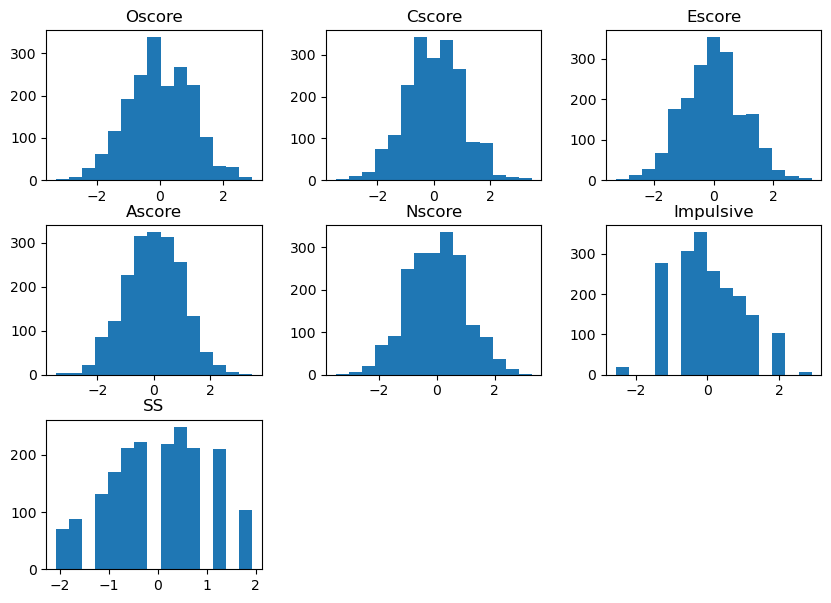

In [39]:
personality_cols = ['Oscore', 'Cscore', 'Escore', 'Ascore', 'Nscore', 'Impulsive', 'SS']
personality_only = dataRaw[personality_cols]

personality_only.hist(bins=15, figsize=(10,7), grid=False)

Interesting! The Big-Five values seem pretty normally distributed, and while the scores for Impulsiveness and Sensation Seeking still look fairly equally distributed, they look a bit odd, not to mention they have a narrower range than the other personality features. This could be because they are not part of the same Personality Analysis theory, so they are measured differently. We will take a closer look in just a moment. First, let's also use the .describe() function on this subset of features to see what we can find out.

In [36]:
personality_only.describe()

,Oscore,Cscore,Escore,Ascore,Nscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,-0.000225,-0.000383,0.000143,0.000242,-0.000119,0.007335,-0.002667
std,0.996402,0.997787,0.997625,0.997481,0.998345,0.954674,0.963575
min,-3.273930,-3.464360,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.717270,-0.652530,-0.695090,-0.606330,-0.678250,-0.711260,-0.525930
50%,-0.019280,-0.006650,0.003320,-0.017290,0.042570,-0.217120,0.079870
75%,0.723300,0.584890,0.637790,0.760960,0.629670,0.529750,0.765400
max,2.901610,3.464360,3.273930,3.464360,3.273930,2.901610,1.921730


Honestly, that's kind of beautiful.
Here is some evidence that our Personality Traits data is normally distributed:

- The mean value of all features approximates to zero
- All features have approximately the same standard deviation value, even if some of their ranges differ

These are our (rounded) observed ranges for all Personality Trait subsets:
- Big-Five features: [-3.5, +3.5]
- Impulsiveness: [-2.5, +3.0]
- Sensation Seeking: [-2.0, +2.0]

I feel tempted to make all of them fit into a [-2.0, +2.0] range just so that they're all in the same scale. If we apply the same transformation (perhaps a simple multiplication?) to all the data points of a column, it will not affect their distribution, only their range, which is beneficial. Let's do that in part 4 - Preprocessing.

### !!! Note to Kamil: !!!
I would suggest:
- Multiplying the values in all the Big-Five features by 0.571 (because it's 2.0/3.5, so if you multiply 3.5 by 0.571 it gives 2.0)
- Multiplying the values in Impulsiveness by 0.666 (so that 3.0 becomes 2.0)
- And I was wondering if, maybe, after all of those transformations, it would be wise to positively offset everything by +2? That way, the range is [0,4] for all features. Maybe this makes future transformations easier? Or do you think it's redundant and can be left between [-2,+2]? Would love to hear your thoughts. I think both are fine, but just putting it out there.


Could it also be interesting to see how many unique values exist in each of these columns? Let's see.

In [37]:
personality_only.nunique()

Oscore       35
Cscore       41
Escore       42
Ascore       41
Nscore       49
Impulsive    10
SS           11
dtype: int64

Well, that sure gives us a hint on why the distribution of the Impulsive and SS values looked different than the rest!

According to the printed output above, the Big-Five scores are measured a lot more continuously than the Impulsive and SS - in other words, the Big-Five contain "more boxes".

From this, we can imagine the Big-Five original scores to be, for example, all integer numbers between -20 and 20 (rounded for simplicity) and the Imp/SS scores to be something between -5 and 5.

Knowing this, let's plot Imp and SS again, but with even less "bins" to see if they look "more normal".

In [67]:
odd_cols = ['Impulsive', 'SS']

imp_and_ss = dataRaw[odd_cols]

array([[<Axes: title={'center': 'Impulsive'}>,
        <Axes: title={'center': 'SS'}>]], dtype=object)

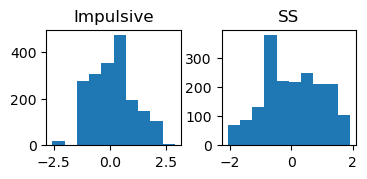

In [68]:
# 10 bins
imp_and_ss.hist(bins=10, figsize=(4,1.5), grid=False)

array([[<Axes: title={'center': 'Impulsive'}>,
        <Axes: title={'center': 'SS'}>]], dtype=object)

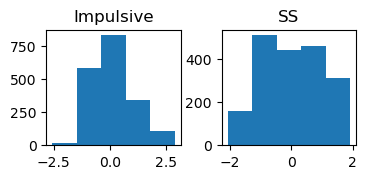

In [69]:
# 5 bins
imp_and_ss.hist(bins=5, figsize=(4,1.5), grid=False)

Okay - Impulsiveness looks pretty normally distributed when we give it the number of "bins" that its data was originally split in, but SS still stands out.

It looks like there is an unusually large amount of respondents scoring between -1.2 and -0.8. What now? Do we trust the data and assume that our respondents were just not very Sensation Seeking given the small sample size, or do we readjust it to have a normal distribution like the other features?

For now, we will leave it as it is.

<<< NOTE TO KAMIL: I tried doing a transformation to make it become Normally Distributed but my attempts failed! I tried doing +2 (so they're all positive) and then square it, but the resulting curve wasn't any better... If you can do it, I think it would be nice. But if you can't, I think it's also okay to leave it as it is because it's not that bad. Let me know :D >>>

Having observed all of this, we conclude that the Personality Trait scores follow a normal distribution, and can move on with our analysis.

### Substances
Substances, substances... There are so many questions that can be asked with the information that we have. Let's break them down:

- Given that our desired label is "user" or "non-user" (as opposed to CL0-CL6 like we have now), when is it a good idea to already our data?

(Let's first see the frequency tendencies we see with each substance and then go from there.)

- What drugs do people consume on a daily-basis?
- What drugs do people consume on a weekly-basis?
- What drugs have our respondents only consumed in the past year?
- And in the past decade?
- What are the drugs that have never been tried by the most people?

(Now would be a good time to transform CL0-CL6 to user/non-user.)

- What drugs have the most and the least users?
- Are there any drugs in our data set that are so rare that they are not even worth adding to our predictions?

Maybe more questions will pop up as we visualize the data. Let's see.

In [72]:
drugs_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

drugs_only = dataRaw[drugs_cols]

In [188]:
# Define a function that prints out a certain substance's frequency

def calc_and_print_frequency(colname, freq):
    try:
        count = drugs_only[colname].value_counts()[freq]
    except:
        count = 0
    pct = round(count / 1885 * 100, 2)
    print_freq(colname,freq,count,pct)


def print_freq(colname, freq, count, pct):
    print(colname + " " + cl_to_words(freq) + str(count) + " \t(" + str(pct) + "%)")

def make_frequency_df(freq):
    pct_by_freq = pd.DataFrame({'Substance': [],
                                'NumOfPeople': [],
                                'PctOfPeople': []})
    i = 0
    for col in drugs_cols:
        try:
            count = drugs_only[col].value_counts()[freq]
        except:
            count = 0
        pct = round(count / 1885 * 100, 2)
        obj = {'Substance': col,
               'NumOfPeople': count,
               'PctOfPeople': pct}
        pct_by_freq.loc[i] = obj
        i = i + 1

    pct_by_freq.sort_values('PctOfPeople', ascending=False, inplace=True)
    pct_by_freq.set_index('Substance', inplace=True)
    return pct_by_freq

def cl_to_words(cl):
    switcher = {
        'CL0': "Never Attempted: ",
        'CL1': "Used Over a Decade Ago: ",
        'CL2': "Used In Last Decade: ",
        'CL3': "Used in Last Year: ",
        'CL4': "Used in Last Month: ",
        'CL5': "Used in Last Week: ",
        'CL6': "Used in Last Day: "
    }
    return switcher.get(cl)

### What substances have these people consumed the **DAY** before the survey?

<Axes: ylabel='Substance'>

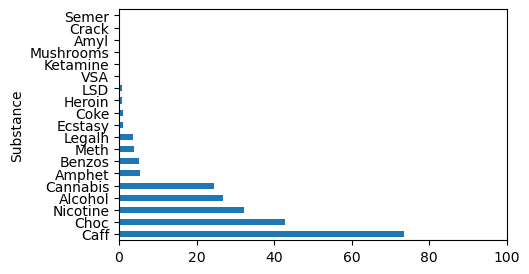

In [190]:
daily = make_frequency_df('CL6')

daily_pct = daily['PctOfPeople']

daily_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [191]:
daily

,NumOfPeople,PctOfPeople
Substance,,
Caff,1384,73.42
Choc,807,42.81
Nicotine,610,32.36
Alcohol,505,26.79
Cannabis,463,24.56
Amphet,102,5.41
Benzos,95,5.04
Meth,73,3.87
Legalh,67,3.55


Very interesting numbers! Observations:

***In the 24 hours before the survey:*** 

*Significant consumption:*   

- Three fourths **(75%)** of the people drank **coffee**.
- **42%** of the people ate **chocolate**.
- A third **(32%)** of the people consumed **nicotine**.
- A fourth **(25%)** of the people drank **alcohol**.
- Also, a fourth **(25%)** of the people smoked **cannabis**!


The most consumed substances on a daily basis are the legal ones, except for cannabis, which, despite being illegal, still scored very high.

***Noticeable consumption:***  

- Amphetamines (102 people, 5%)
- Benzodiazepines (95 people, 5%)
- Legal Highs (67 people, 3%)
- Methadone (73 people, 4%)

This was interesting to notice. Apart from legal highs, the second "level" of drugs that are being consumed on the daily basis are those that, despite being illegal recreationally, can be prescribed medically (amphetamines for ADHD, benzodiazepines for anxiety/insomnia, and methadone for pain relief and Opioid Use Disorder). Unfortunately, we have no data on how each respondent acquired each drug they have consumed, but we can assume with fair confidence that the trend for these drugs to be higher on the list is that they are being acquired in a prescription context.

***Low consumption:***  

- Ecstasy (21 people, 1.11%)
- Coke (19 people, 1.01%)
- LSD (13 people, 0.69%)
- Ketamine (13 people, 0.69%)
- Volatile Substances (7 people, 0.37%)
- Mushrooms (4 people, 0.21%)
- Amyl Nitrite (3 people, 0.16%)
- Heroin (3 people, 0.16%)
- Crack (2 people, 0.11%)

Although some of these substances are a bit hardcore, there was always at least someone who had used them in the past day. That's wild, but it means we got a good group of respondents. (Because the ideal group of respondents would range from super sober people to people who are straight up unhinged.)

***No consumption at all:***

- Semer (0 people)

It's very appropriate that no one answered that they had done Semer in the past day - since this drug is fictional. It would have been hilarious if someone had claimed that, but no. Maybe with a bigger sample size. Anyway. :)

### What substances have these people consumed the **WEEK** before the survey?

<Axes: ylabel='Substance'>

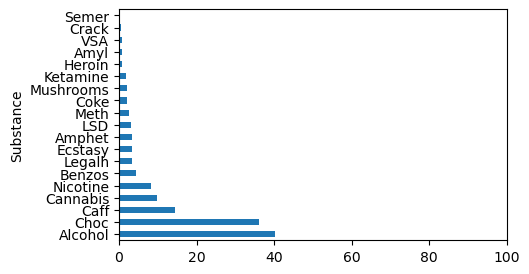

In [192]:
weekly = make_frequency_df('CL5')

weekly_pct = weekly['PctOfPeople']

weekly_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [193]:
weekly

,NumOfPeople,PctOfPeople
Substance,,
Alcohol,758,40.21
Choc,682,36.18
Caff,273,14.48
Cannabis,185,9.81
Nicotine,157,8.33
Benzos,84,4.46
Legalh,64,3.40
Ecstasy,63,3.34
Amphet,61,3.24


~ observations go here... ~

### What substances have these people consumed the **MONTH** before the survey?

In [ ]:
# code for graph

In [ ]:
# code for list

### What substances have these people consumed the **YEAR** before the survey?

In [ ]:
# code for graph

In [ ]:
# code for list

### What substances have these people consumed the **DECADE** before the survey?

In [ ]:
# code for graph

In [ ]:
# code for list

### What substances have these people **NEVER** consumed... before the survey?

In [ ]:
# code for graph

In [ ]:
# code for list

### **~ ~ ~ data transformation from CL0-CL6 to user/non-user, with justification ~ ~ ~**

In [ ]:
# code code code transformation

### What substances have the most and the least users?

In [ ]:
# code for list

### Are there any substances in our data set that are so rare that they are not even worth adding to our predictions?

(probably just markdown since we can see the info above)

### Features Correlation   
(intro...)

In [9]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a correlation matrix
# correlation_matrix = dataQuantified.corr()

# # Create a heatmap
# plt.figure(figsize=(15, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

The data requires preprocessing